# Data cleaning

In [1]:
#importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading in the data

In [2]:
#loading dataset 
df = pd.read_csv('/Users/sasha/Desktop/DATASCIENCE/2023/Mini-Project/data.nosync/features_second.csv', dtype={'Account':str, 'to_account':str}, names=['unamed', 'Account', 'Amount', 'Balance', 'to_account', 'to_name', 'Date', 'Time', 'Transaction_ID', 'Decimal_time', 'Income', 'Employment', 'Day_type', 'Day'], header=0)
df.drop(['unamed'], axis=1,inplace=True)
print(np.shape(df))


(174601, 13)


In [3]:
df.head()

,Account,Amount,Balance,to_account,to_name,Date,Time,Transaction_ID,Decimal_time,Income,Employment,Day_type,Day
0,1461,1352.0,2582.04,1379.0,Starbucks,01/01/2020,00:00:00,0,0.0,2811.08,Employed,weekday,Wednesday
1,1088,1251.2,2285.19,1244.0,Adams,01/01/2020,00:00:00,1,0.0,2603.54,Employed,weekday,Wednesday
2,1447,1968.5,2479.09,1101.0,North Face,01/01/2020,00:00:00,2,0.0,4043.70,Employed,weekday,Wednesday
3,1207,1352.0,2530.55,1178.0,Coffee #1,01/01/2020,00:00:00,3,0.0,2768.97,Employed,weekday,Wednesday
4,1136,1968.5,3627.45,1305.0,Cass Art,01/01/2020,00:00:00,4,0.0,3975.15,Employed,weekday,Wednesday


### Cleaning

Rounding the money values

In [4]:
df['Amount'] = df['Amount'].round(2)
df['Balance'] = df['Balance'].round(2)

### Missing values

Here I am just checking for any obvious patterns in the NaN values, such as transactions where each feature is NaN

<AxesSubplot:>

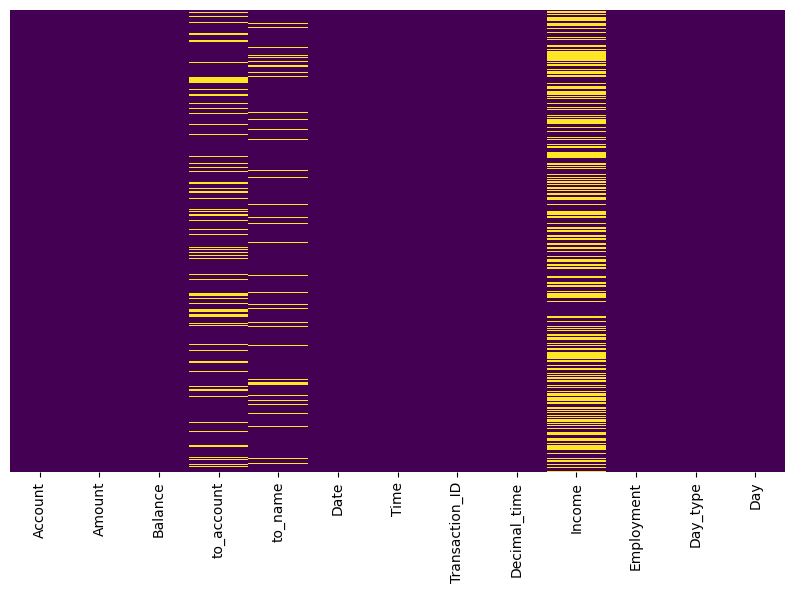

In [5]:
#Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

#### This function returns the NA status of each column

In [6]:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
        if missing_vals == 0:
             print(f"{col} => No missing values")
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
    if total == 0:
        print("no missing values left")

In [7]:
print("\n How many missing values each column has and what percentage this is:")    
#Using the function above to see our missing values  
missing_cols(df)       



 How many missing values each column has and what percentage this is:
Account => No missing values
Amount => No missing values
Balance => No missing values
to_account => 28841
to_account => 16.52%
to_name => 15252
to_name => 8.74%
Date => No missing values
Time => No missing values
Transaction_ID => No missing values
Decimal_time => No missing values
Income => 79494
Income => 45.53%
Employment => No missing values
Day_type => No missing values
Day => No missing values


So we only have missing values in 2 of the columns, where there does not seem to be any overlapping

In [8]:
set(np.array(df[pd.isna(df['to_account'])]['to_name']))

{'Deliveroo', 'Halifax'}

So all values with NaN in to account, are either Deliveroo or Halifax to name

In [9]:
myList = np.array(df[(df['to_name'] == 'Halifax') | (df['to_name'] == 'Deliveroo')]["to_account"])

In [10]:
from math import nan
import math
 
print("The original list is:", myList)
newList = list()
for element in myList:
    if not math.isnan(element):
        newList.append(element)
 
print("Output list is:", newList)

The original list is: [nan nan nan ... nan nan nan]
Output list is: []


So all values to halifax and deliveroo have no account number, as account number is a string I will fill in all these missing values

In [11]:
halifax_indexes = df[(df['to_name'] == 'Halifax')].index
deliveroo_indexes = df[(df['to_name'] == 'Deliveroo')].index

df.loc[halifax_indexes, "to_account"] = 'Halifax'
df.loc[deliveroo_indexes, "to_account"] = 'Deliveroo'

In [12]:
print("\n How many missing values each column has and what percentage this is:")    
#Using the function above to see our missing values  
missing_cols(df)  


 How many missing values each column has and what percentage this is:
Account => No missing values
Amount => No missing values
Balance => No missing values
to_account => No missing values
to_name => 15252
to_name => 8.74%
Date => No missing values
Time => No missing values
Transaction_ID => No missing values
Decimal_time => No missing values
Income => 79494
Income => 45.53%
Employment => No missing values
Day_type => No missing values
Day => No missing values


Lets inspect NaN to name values

In [13]:
df[pd.isna(df['to_name'])]

,Account,Amount,Balance,to_account,to_name,Date,Time,Transaction_ID,Decimal_time,Income,Employment,Day_type,Day
98,1381,-850.00,2656.70,1036.0,NaN,01/01/2020,00:00:00,98,0.00,4414.23,Employed,weekday,Wednesday
99,1036,850.00,3171.21,1381.0,NaN,01/01/2020,00:00:00,99,0.00,NaN,Unemployed,weekday,Wednesday
100,1444,-800.00,2508.76,1036.0,NaN,01/01/2020,00:00:00,100,0.00,4444.92,Employed,weekday,Wednesday
101,1036,800.00,3971.21,1444.0,NaN,01/01/2020,00:00:00,101,0.00,NaN,Unemployed,weekday,Wednesday
102,1138,-500.00,759.27,1036.0,NaN,01/01/2020,00:00:00,102,0.00,NaN,Unemployed,weekday,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174571,1034,5600.00,946.65,1069.0,NaN,03/31/2020,23:34:00,174571,23.57,2505.22,Employed,weekday,Tuesday
174575,1486,-17.07,-3762.53,1351.0,NaN,03/31/2020,23:37:00,174575,23.62,NaN,Unemployed,weekday,Tuesday
174576,1351,17.07,1012.70,1486.0,NaN,03/31/2020,23:37:00,174576,23.62,NaN,Unemployed,weekday,Tuesday
174590,1164,-2000.00,13359.93,121.0,NaN,03/31/2020,23:50:00,174590,23.83,9855.66,Employed,weekday,Tuesday


Are any of these NaN's businesses?

In [14]:
for x in set(np.array(df['to_name'])):
    print(x)
    print(len(df[df.to_name == x]['to_account'].unique()))

nan
0
CeX
1
Blackwell's
1
Red Lion
1
PUREGYM
1
JD Sports
1
Millets
1
The Royal Oak
1
Waterstones
1
SUNNY CARE NURSERY
1
Tesco Express
1
Hobbycraft
1
HMV
1
Bill's
1
Coop local
1
Pets Corner
1
ASK Italian
1
H&M
1
Wool
1
Starbucks
1
Game
1
White Hart
1
TK Maxx
1
Mountain Warehouse
1
Mickleburgh Musical Instruments
1
Next
1
Matalan
1
Cass Art
1
Sainsbury local
1
Nike
1
North Face
1
Gap Kids
1
Pets at Home
1
The Crown
1
Harvester
1
Costa Coffee
1
Adams
1
Halifax
1
A Yarn Story
1
Hobgoblin Music
1
Rose & Crown
1
PizzaExpress
1
PureGym
1
Coffee #1
1
Deliveroo
1
Sports Direct
1


So all these NaN are NaN because they are transactions to other people

In [15]:
df.loc[pd.isna(df.to_name), "to_name"] = 'Between'

In [16]:
print("\n How many missing values each column has and what percentage this is:")    
#Using the function above to see our missing values  
missing_cols(df) 


 How many missing values each column has and what percentage this is:
Account => No missing values
Amount => No missing values
Balance => No missing values
to_account => No missing values
to_name => No missing values
Date => No missing values
Time => No missing values
Transaction_ID => No missing values
Decimal_time => No missing values
Income => 79494
Income => 45.53%
Employment => No missing values
Day_type => No missing values
Day => No missing values


Yay, no missing values

### Let's add more features

In [17]:
df

,Account,Amount,Balance,to_account,to_name,Date,Time,Transaction_ID,Decimal_time,Income,Employment,Day_type,Day
0,1461,1352.00,2582.04,1379.0,Starbucks,01/01/2020,00:00:00,0,0.00,2811.08,Employed,weekday,Wednesday
1,1088,1251.20,2285.19,1244.0,Adams,01/01/2020,00:00:00,1,0.00,2603.54,Employed,weekday,Wednesday
2,1447,1968.50,2479.09,1101.0,North Face,01/01/2020,00:00:00,2,0.00,4043.70,Employed,weekday,Wednesday
3,1207,1352.00,2530.55,1178.0,Coffee #1,01/01/2020,00:00:00,3,0.00,2768.97,Employed,weekday,Wednesday
4,1136,1968.50,3627.45,1305.0,Cass Art,01/01/2020,00:00:00,4,0.00,3975.15,Employed,weekday,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174596,1391,-19.24,-6585.98,Deliveroo,Deliveroo,03/31/2020,23:55:00,174596,23.92,NaN,Unemployed,weekday,Tuesday
174597,1405,-10.99,-1179.87,Deliveroo,Deliveroo,03/31/2020,23:56:00,174597,23.93,9624.01,Employed,weekday,Tuesday
174598,1391,-20.89,-6606.87,Deliveroo,Deliveroo,03/31/2020,23:56:00,174598,23.93,NaN,Unemployed,weekday,Tuesday
174599,1391,-17.24,-6624.11,Deliveroo,Deliveroo,03/31/2020,23:57:00,174599,23.95,NaN,Unemployed,weekday,Tuesday


### More cleaning

In [18]:
df[df.to_name == 'Between']['Amount'].sum()

0.0

So all payments between customers are recorded twice, this may skew the data. We can make the 2 recoreded transactions have the same transaction ID

In [19]:
def altElement(a):
    return a[::2]


In [20]:
for i in altElement(df[df.to_name == 'Between'].index):
    df.loc[df.index == i, 'Transaction_ID'] = df.loc[df.index == i, 'Transaction_ID'] + 1


In [21]:
df[df.to_name == 'Between']

,Account,Amount,Balance,to_account,to_name,Date,Time,Transaction_ID,Decimal_time,Income,Employment,Day_type,Day
98,1381,-850.00,2656.70,1036.0,Between,01/01/2020,00:00:00,99,0.00,4414.23,Employed,weekday,Wednesday
99,1036,850.00,3171.21,1381.0,Between,01/01/2020,00:00:00,99,0.00,NaN,Unemployed,weekday,Wednesday
100,1444,-800.00,2508.76,1036.0,Between,01/01/2020,00:00:00,101,0.00,4444.92,Employed,weekday,Wednesday
101,1036,800.00,3971.21,1444.0,Between,01/01/2020,00:00:00,101,0.00,NaN,Unemployed,weekday,Wednesday
102,1138,-500.00,759.27,1036.0,Between,01/01/2020,00:00:00,103,0.00,NaN,Unemployed,weekday,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174571,1034,5600.00,946.65,1069.0,Between,03/31/2020,23:34:00,174571,23.57,2505.22,Employed,weekday,Tuesday
174575,1486,-17.07,-3762.53,1351.0,Between,03/31/2020,23:37:00,174576,23.62,NaN,Unemployed,weekday,Tuesday
174576,1351,17.07,1012.70,1486.0,Between,03/31/2020,23:37:00,174576,23.62,NaN,Unemployed,weekday,Tuesday
174590,1164,-2000.00,13359.93,121.0,Between,03/31/2020,23:50:00,174591,23.83,9855.66,Employed,weekday,Tuesday


In [22]:
df[df.Account == '1088']

,Account,Amount,Balance,to_account,to_name,Date,Time,Transaction_ID,Decimal_time,Income,Employment,Day_type,Day
1,1088,1251.20,2285.19,1244.0,Adams,01/01/2020,00:00:00,1,0.00,2603.54,Employed,weekday,Wednesday
204,1088,-12.99,2272.20,1187.0,PUREGYM,01/01/2020,00:00:00,204,0.00,2603.54,Employed,weekday,Wednesday
1352,1088,-9.74,2262.46,1197.0,Harvester,01/01/2020,13:06:00,1352,13.10,2603.54,Employed,weekday,Wednesday
1782,1088,-1.80,2260.66,1388.0,Costa Coffee,01/01/2020,18:03:00,1782,18.05,2603.54,Employed,weekday,Wednesday
1900,1088,-550.00,1710.66,Halifax,Halifax,01/01/2020,18:40:00,1900,18.67,2603.54,Employed,weekday,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168583,1088,-3.00,-4383.21,1388.0,Costa Coffee,03/29/2020,18:53:00,168583,18.88,2603.54,Employed,weekend,Sunday
171094,1088,-2.90,-4386.11,1388.0,Costa Coffee,03/30/2020,18:34:00,171094,18.57,2603.54,Employed,weekday,Monday
171449,1088,-141.57,-4527.68,1403.0,Coop local,03/30/2020,22:24:00,171449,22.40,2603.54,Employed,weekday,Monday
173605,1088,-6.44,-4534.12,1178.0,Coffee #1,03/31/2020,13:17:00,173605,13.28,2603.54,Employed,weekday,Tuesday


In [23]:
2285.19 - 12.99

2272.2000000000003

Negative amounts are the customer spending, balance represents the balance after the transaction

### Exporting data

In [24]:
df.to_csv("/Users/sasha/Desktop/DATASCIENCE/2023/Mini-Project/data.nosync/clean_data_set_2.csv")

### Describing the data

In [25]:
#check dimensions of the data

print('\n info:')
df.info()

# Finding out the range of dates
print('\n Date range:', df["Date"].min(), df["Date"].max())


 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174601 entries, 0 to 174600
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Account         174601 non-null  object 
 1   Amount          174601 non-null  float64
 2   Balance         174601 non-null  float64
 3   to_account      174601 non-null  object 
 4   to_name         174601 non-null  object 
 5   Date            174601 non-null  object 
 6   Time            174601 non-null  object 
 7   Transaction_ID  174601 non-null  int64  
 8   Decimal_time    174601 non-null  float64
 9   Income          95107 non-null   float64
 10  Employment      174601 non-null  object 
 11  Day_type        174601 non-null  object 
 12  Day             174601 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 17.3+ MB

 Date range: 01/01/2020 03/31/2020


In [26]:
print(len(df.Account.unique()))
print(len(df.to_name.unique()))

486
46


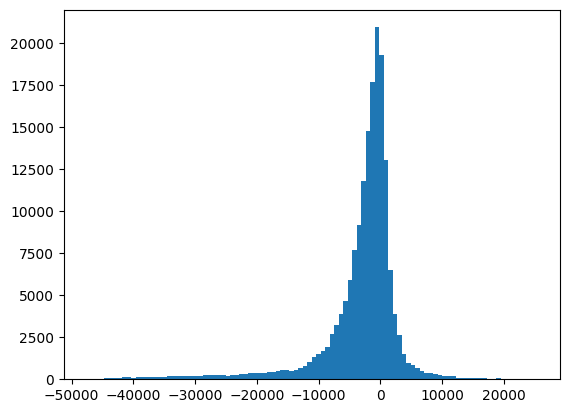

In [27]:
plt.hist(df['Balance'], bins=100)
plt.show() 

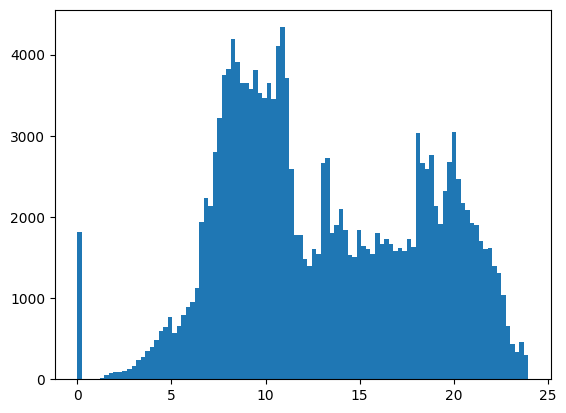

In [29]:
plt.hist(df['Decimal_time'], bins=100)
plt.show() 

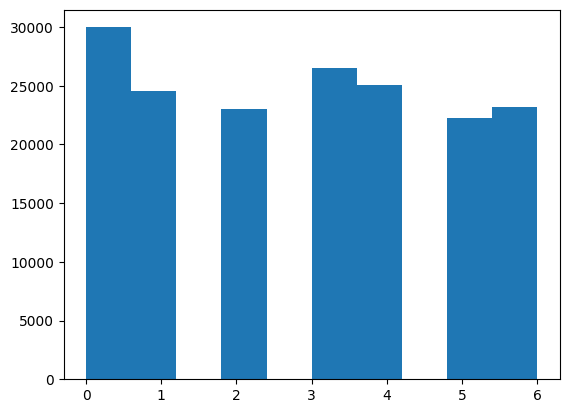

In [ ]:
plt.hist(df['Day'])
plt.show() 

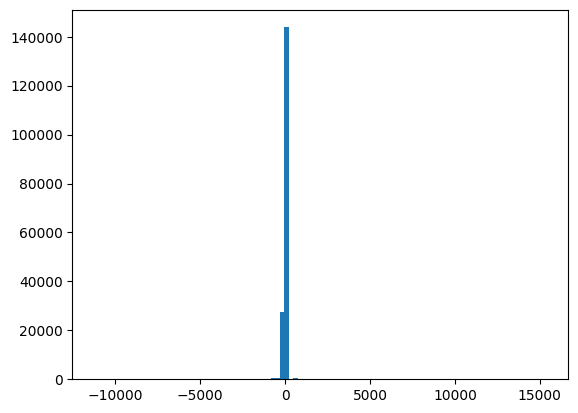

In [ ]:
plt.hist(df['Amount'], bins=100)
plt.show() 

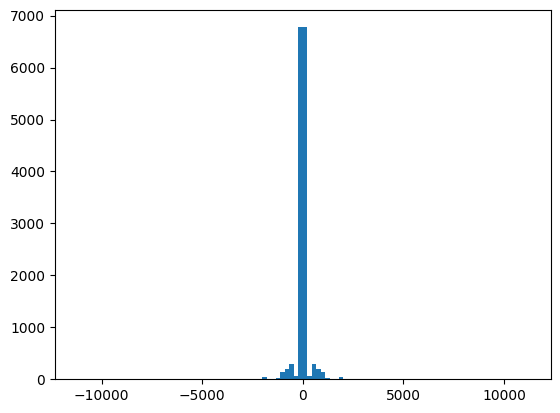

In [ ]:
plt.hist(df[df.to_name == 'Between']['Amount'], bins=100)
plt.show() 

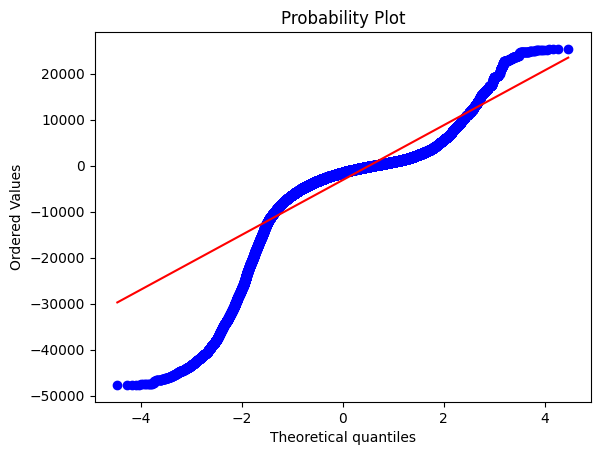

In [ ]:
import pylab 
import scipy.stats as stats

stats.probplot(df['Balance'], dist="norm", plot=pylab)
pylab.show()

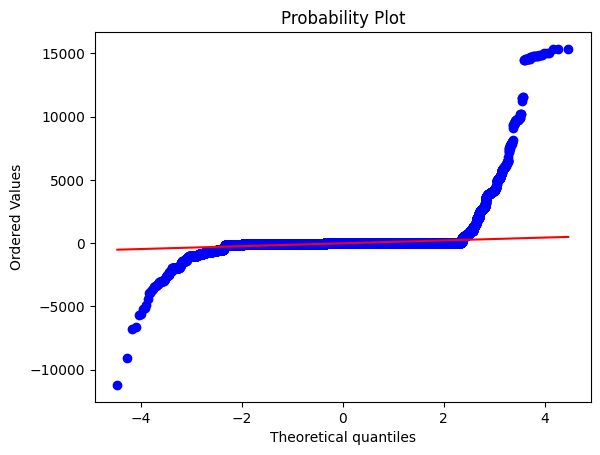

In [ ]:
import pylab 
import scipy.stats as stats

stats.probplot(df['Amount'], dist="norm", plot=pylab)
pylab.show()

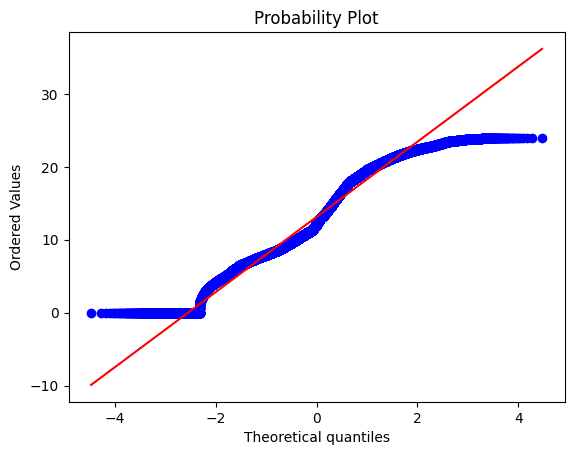

In [ ]:
import pylab 
import scipy.stats as stats

stats.probplot(df['Decimal_Time'], dist="norm", plot=pylab)
pylab.show()

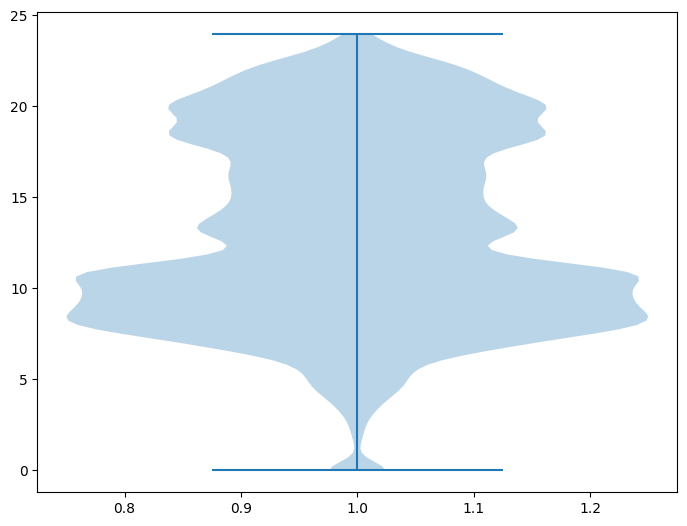

In [ ]:
import matplotlib.pyplot as plt

## combine these different collections into a list
data_to_plot = [df['Decimal_Time']]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

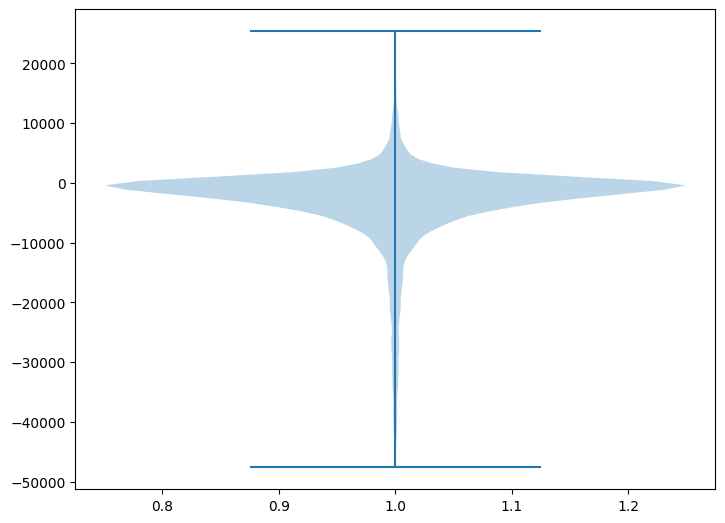

In [ ]:

## combine these different collections into a list
data_to_plot = [df['Balance']]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

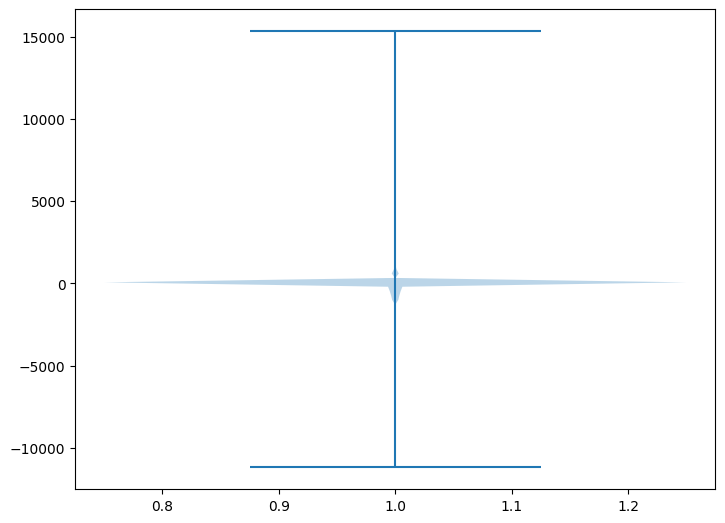

In [ ]:

## combine these different collections into a list
data_to_plot = [df['Amount']]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

In [ ]:
business_number_list = []
for name in df['to_name'].unique():
    if name != 'Between':
        business_number_list.append(df[df.to_name == name]['to_account'].iloc[0])
print(business_number_list)

['1379', '1244', '1101', '1178', '1305', '1027', '1167', '1085', '1411', '1388', '1234', '1368', '1521', '1418', '1010', 'Halifax', '1211', '1187', '1403', 'Deliveroo', '1342', '1286', '1217', '1410', '1269', '1502', '1473', '1274', '1345', '1122', '1481', '1107', '1130', '1483', '1045', '1242', '1256', '1220', '1480', '1331', '1197', '1142', '1522', '1367', '1187']


In [ ]:
for num in business_number_list:
    print(num if num in np.array(df['Account']) else 0)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


So no businesses are "spending money"